In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [2]:
train = pd.read_csv('F:/ML sources/Datasets/Jester Practice Problem/train.csv')
test = pd.read_csv('F:/ML sources/Datasets/Jester Practice Problem/test.csv')
jokes = pd.read_csv('F:/ML sources/Datasets/Jester Practice Problem/jokes.csv')

In [17]:
def average_word_length(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
# jokes['average_length'] = jokes['joke_text'].apply(lambda x : average_word_length(x))

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

jokes['stopwords'] = jokes['joke_text'].apply(lambda x: len([x for x in x.lower().split() if x in stop]))
jokes.head()

,joke_id,joke_text,stopwords
0,1,Q. What's O. J. Simpson's web address? A. Slas...,0
1,2,How many feminists does it take to screw in a ...,7
2,3,Q. Did you hear about the dyslexic devil worsh...,7
3,4,They asked the Japanese visitor if they have e...,8
4,5,Q: What did the blind person say when given so...,7


In [19]:
jokes['joke_text'] = jokes['joke_text'].apply(lambda x: x.lower())

In [20]:
jokes['joke_text'] = jokes['joke_text'].str.replace('[^a-zA-Z]',' ')

In [21]:
jokes['joke_text'] = jokes['joke_text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

In [14]:
# jokes['joke_test_without_stwrd'] = jokes['joke_test_without_stwrd'].str.lower()

In [16]:
# jokes.drop(['joke_text'],axis=1,inplace=True)

In [20]:
# jokes.rename(columns={'joke_test_without_stwrd':'joke_text'},inplace=True)

In [22]:
jokes['joke_text'] = jokes['joke_text'].str.replace('[^a-zA-Z]',' ')

In [34]:
jokes.head()

,joke_id,joke_text,stopwords,characters_count,word_count,average_length,polarity,subjectivity
0,1,simpson web address slash slash backwash slash...,0,64,11,4.909091,0.000000,0.000000
1,2,many feminist take screw light bulb funny,7,42,7,5.142857,0.383333,0.733333
2,3,hear dyslexic devil worshiper sold soul santa,7,47,8,5.000000,0.000000,0.000000
3,4,asked japanese visitor election country every ...,8,62,8,6.875000,0.000000,0.000000
4,5,blind person say given match hell wrote,7,42,8,4.375000,-0.500000,0.666667


In [24]:
jokes['characters_count'] = jokes['joke_text'].apply(lambda x : len(str(x)))
jokes['word_count'] = jokes['joke_text'].apply(lambda x : len(str(x).split(" ")))
jokes['average_length'] = jokes['joke_text'].apply(lambda x : average_word_length(x))

In [26]:
freq = pd.Series(' '.join(jokes['joke_text']).split()).value_counts()
# freq

In [27]:
freq_words = freq[0:12]

In [28]:
freq_words = list(freq_words.index)
freq_words.append('q')

In [29]:
jokes['joke_text'] = jokes['joke_text'].apply(lambda x : " ".join(x for x in x.split() if x not in freq_words))

In [30]:
jokes['joke_text'] = jokes['joke_text'].apply(lambda x : " ".join(x for x in x.split() if len(x)>1 ))

In [31]:
from textblob import TextBlob
jokes['joke_text'] = jokes['joke_text'].apply(lambda x: str(TextBlob(x).correct()))

In [32]:
from textblob import Word
jokes['joke_text'] = jokes['joke_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [33]:
jokes['polarity'] = jokes['joke_text'].apply(lambda x: TextBlob(x).sentiment[0])
jokes['subjectivity'] = jokes['joke_text'].apply(lambda x: TextBlob(x).sentiment[1])

In [60]:
# jokes_2 = jokes.drop(['joke_text'],axis=1)

In [62]:
# train = pd.merge(train,jokes_2,on="joke_id")
# test = pd.merge(test,jokes_2,on="joke_id")

In [55]:
train.head(20)

,id,user_id,joke_id,Rating,user_id_freq,joke_id_freq
0,31030_110,31030,110,2.750,85,7460
1,16144_109,16144,109,5.094,18,12111
2,23098_6,23098,6,-6.438,15,27498
3,14273_86,14273,86,4.406,57,6814
4,18419_134,18419,134,9.375,57,6490
5,5782_14,5782,14,-1.781,85,2985
6,34059_62,34059,62,6.250,58,12835
7,1159_9,1159,9,-2.906,12,27125
8,17736_32,17736,32,-5.750,27,6056
9,22626_22,22626,22,1.656,9,15079


In [52]:
train['user_id_freq'] = train.groupby('user_id')['user_id'].transform('count')

In [54]:
train['joke_id_freq'] = train.groupby('joke_id')['joke_id'].transform('count')

C:\Users\gaura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


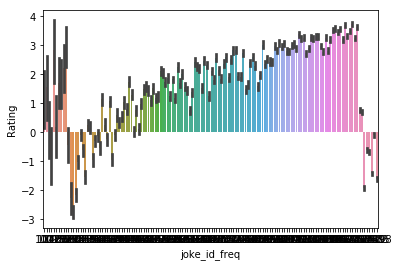

In [79]:
train2 = pd.read_csv('F:/ML sources/Datasets/Jester Practice Problem/train.csv')
test2 = pd.read_csv('F:/ML sources/Datasets/Jester Practice Problem/test.csv')

In [81]:
train2_id = train2['id']

In [83]:
train2_id = pd.DataFrame(train2_id)

In [88]:
train = pd.merge(train2_id,train,on="id")

In [4]:
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [90]:
test2_id = test2['id']
test2_id = pd.DataFrame(test2_id)
test = pd.merge(test2_id,test,on='id')
train.drop(['id'],axis=1,inplace=True)

In [98]:
X = train.drop(['Rating'],axis=1)
Y = train['Rating']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [99]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=9,learning_rate=0.1,n_estimators=100,n_jobs=-1,random_state=42)
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_train)

In [100]:
from sklearn.metrics import mean_squared_error
Y_pred2 = xgb.predict(X_test)

In [101]:
a = mean_squared_error(Y_train,Y_pred)
b = mean_squared_error(Y_test,Y_pred2)

In [102]:
np.sqrt(a),np.sqrt(b)

(4.8098105027639795, 4.865125285568536)

In [104]:
test.drop(['id'],axis=1,inplace=True)

In [105]:
Y_pred3 = xgb.predict(test)

In [111]:
# Y_pred3 = pd.DataFrame(Y_pred3)
j = Y_pred3.to_csv('Jester_accuracy.csv')

In [108]:
Y_pred3['id'] = test2_id['id']

In [110]:
Y_pred3.rename(columns={0:'Rating'},inplace=True)

In [114]:
feature_importances=xgb.feature_importances_

In [115]:
feature_importances

array([0.6320706 , 0.13284196, 0.04693749, 0.03111073, 0.05362244,
       0.03079648, 0.04093818, 0.03168209], dtype=float32)

In [3]:
test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [118]:
from xgboost import XGBRegressor
xgb2 = XGBRegressor(max_depth=11,learning_rate=0.1,n_estimators=100,n_jobs=-1,random_state=42)
xgb2.fit(X_train,Y_train)
Y_pred4=xgb2.predict(X_test)
c = mean_squared_error(Y_test,Y_pred4)
np.sqrt(c)

4.843277915840225

In [119]:
from xgboost import XGBRegressor
xgb3 = XGBRegressor(max_depth=11,learning_rate=0.1,n_estimators=150,n_jobs=-1,random_state=42)
xgb3.fit(X_train,Y_train)
Y_pred5=xgb3.predict(X_test)
d = mean_squared_error(Y_test,Y_pred5)
np.sqrt(d)

4.787068474333641

In [122]:
# from xgboost import XGBRegressor
# xgb4 = XGBRegressor(max_depth=13,learning_rate=0.1,n_estimators=150,n_jobs=-1,random_state=42)
# xgb4.fit(X_train,Y_train)
# Y_pred6=xgb4.predict(X_test)
e = mean_squared_error(Y_test,Y_pred6)
np.sqrt(e)

4.747458044023002

In [121]:
from xgboost import XGBRegressor
xgb5 = XGBRegressor(max_depth=11,learning_rate=0.1,n_estimators=200,n_jobs=-1,random_state=42)
xgb5.fit(X_train,Y_train)
Y_pred7=xgb5.predict(X_test)
f = mean_squared_error(Y_test,Y_pred7)
np.sqrt(f)

4.746152279697

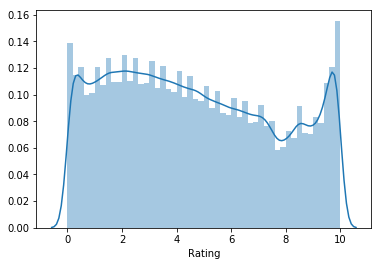

In [15]:
sns.distplot(np.sqrt(np.square(train['Rating'])))

In [61]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'F:/ML sources/glove.6B/glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 50)

In [63]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.50d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523603677749634)]


C:\Users\gaura\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
